# Explore data in Iceberg

In [1]:
import duckdb

%config SqlMagic.feedback = True
%config SqlMagic.displaycon = True

## Setup DuckDB Connection

In [2]:
conn = duckdb.connect()
%load_ext sql
%sql conn --alias duckdb

The 'toml' package isn't installed. To load settings from pyproject.toml or ~/.jupysql/config, install with: pip install toml

In [3]:
%%sql duckdb
INSTALL iceberg;
LOAD iceberg;
UPDATE EXTENSIONS;

ATTACH 'warehouse' AS icecat (TYPE ICEBERG, ENDPOINT 'http://localhost:8181', AUTHORIZATION_TYPE 'none');
USE icecat.default;

Success


In [4]:
%sql SELECT COUNT(*) FROM icecat.default.raw_events;

Running query in 'duckdb'

count_star()
2000


In [5]:
%%sql duckdb
SELECT
    *
FROM icecat.default.raw_events
LIMIT 5

id,user_id,amount,vendor_id,event_timestamp
404800620083,48,26.79,254,2025-08-24 00:01:52-07:00
404800620092,54,29.28,707,2025-08-23 22:45:48-07:00
404800620100,29,23.08,83,2025-08-24 07:55:52-07:00
404800620102,46,19.73,619,2025-08-24 11:23:01-07:00
404800620136,95,13.79,174,2025-08-24 01:12:22-07:00


In [ ]:
%%sql
# Uses the `dt` partition under the hood
SELECT
    *
FROM icecat.default.raw_events
WHERE
    event_timestamp BETWEEN '2025-08-15' AND '2025-09-10'

Running query in 'duckdb'

id,user_id,amount,vendor_id,event_timestamp
404800620083,48,26.79,254,2025-08-24 00:01:52-07:00
404800620092,54,29.28,707,2025-08-23 22:45:48-07:00
404800620100,29,23.08,83,2025-08-24 07:55:52-07:00
404800620102,46,19.73,619,2025-08-24 11:23:01-07:00
404800620136,95,13.79,174,2025-08-24 01:12:22-07:00
404800620149,94,15.67,239,2025-08-24 16:41:29-07:00
404800620217,3,66.18,135,2025-08-23 18:33:09-07:00
404800620225,0,39.29,858,2025-08-24 15:47:53-07:00
404800620236,12,14.70,496,2025-08-24 02:27:07-07:00
404800620272,74,26.24,998,2025-08-24 15:36:56-07:00


In [23]:
%%sql
SELECT * FROM iceberg_snapshots('icecat.default.raw_events');

Running query in 'duckdb'

sequence_number,snapshot_id,timestamp_ms,manifest_list
4,5684812838621277724,2025-09-15 00:56:10.863000,file:///tmp/warehouse/default/raw_events/metadata/snap-5684812838621277724-0-2ce3dcd1-4895-43d1-9b44-71918f5ab90b.avro
3,8216567921051981541,2025-09-15 00:56:10.808000,file:///tmp/warehouse/default/raw_events/metadata/snap-8216567921051981541-0-10cc8b5e-e05a-4171-b77a-a3434b92d169.avro
2,6768109534693656825,2025-09-14 23:15:25.586000,file:///tmp/warehouse/default/raw_events/metadata/snap-6768109534693656825-0-dd8391f8-e90e-4aca-83cb-fec1fd31f0b0.avro
1,7252827444344540085,2025-09-14 23:15:25.533000,file:///tmp/warehouse/default/raw_events/metadata/snap-7252827444344540085-0-1867ca2e-8331-4f43-9767-72406f11baa2.avro


In [7]:
%%sql duckdb
SELECT 
    *
FROM iceberg_metadata('icecat.default.raw_events')

manifest_path,manifest_sequence_number,manifest_content,status,content,file_path,file_format,record_count
file:///tmp/warehouse/default/raw_events/metadata/a0b6c380-baf5-4471-a591-791cf3558b96-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-08-10/00000-0-a0b6c380-baf5-4471-a591-791cf3558b96.parquet,PARQUET,33
file:///tmp/warehouse/default/raw_events/metadata/a0b6c380-baf5-4471-a591-791cf3558b96-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-08-12/00000-1-a0b6c380-baf5-4471-a591-791cf3558b96.parquet,PARQUET,29
file:///tmp/warehouse/default/raw_events/metadata/a0b6c380-baf5-4471-a591-791cf3558b96-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-08-21/00000-2-a0b6c380-baf5-4471-a591-791cf3558b96.parquet,PARQUET,36
file:///tmp/warehouse/default/raw_events/metadata/a0b6c380-baf5-4471-a591-791cf3558b96-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-08-14/00000-3-a0b6c380-baf5-4471-a591-791cf3558b96.parquet,PARQUET,31
file:///tmp/warehouse/default/raw_events/metadata/a0b6c380-baf5-4471-a591-791cf3558b96-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-08-09/00000-4-a0b6c380-baf5-4471-a591-791cf3558b96.parquet,PARQUET,34
file:///tmp/warehouse/default/raw_events/metadata/a0b6c380-baf5-4471-a591-791cf3558b96-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-08-07/00000-5-a0b6c380-baf5-4471-a591-791cf3558b96.parquet,PARQUET,38
file:///tmp/warehouse/default/raw_events/metadata/a0b6c380-baf5-4471-a591-791cf3558b96-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-08-22/00000-6-a0b6c380-baf5-4471-a591-791cf3558b96.parquet,PARQUET,37
file:///tmp/warehouse/default/raw_events/metadata/a0b6c380-baf5-4471-a591-791cf3558b96-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-08-20/00000-7-a0b6c380-baf5-4471-a591-791cf3558b96.parquet,PARQUET,34
file:///tmp/warehouse/default/raw_events/metadata/a0b6c380-baf5-4471-a591-791cf3558b96-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-08-28/00000-8-a0b6c380-baf5-4471-a591-791cf3558b96.parquet,PARQUET,33
file:///tmp/warehouse/default/raw_events/metadata/a0b6c380-baf5-4471-a591-791cf3558b96-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-09-04/00000-9-a0b6c380-baf5-4471-a591-791cf3558b96.parquet,PARQUET,32


## Time Travel Querying

In [8]:
%%sql duckdb
-- Time travel!
SELECT
    COUNT(*)
FROM iceberg_scan("icecat.default.raw_events", snapshot_from_id=5214740565959147485)

count_star()
1000


## Plotting Data

In [16]:
%%sql --save raw_events --no-execute
SELECT
    *
FROM icecat.default.raw_events

Running query in 'duckdb'

Skipping execution...

<Axes: title={'center': "'amount' from 'raw_events'"}, ylabel='amount'>

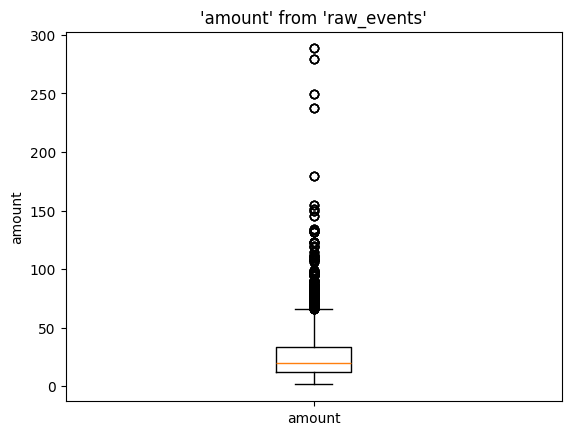

In [17]:
%sqlplot boxplot --table raw_events --column amount

## Look for injected anomalies

In [18]:
%%sql
SELECT
    *
from icecat.default.raw_events
WHERE
    user_id = '42'

Generating CTE with stored snippets: 'raw_events'

Running query in 'duckdb'

id,user_id,amount,vendor_id,event_timestamp
404800620599,42,18.29,776,2025-08-10 09:27:30-07:00
404800620974,42,7.75,486,2025-08-06 20:18:31-07:00
404800621065,42,8.38,787,2025-08-07 10:03:02-07:00
404800620714,42,23.57,903,2025-08-31 06:04:28-07:00
404800620185,42,119.73,640,2025-08-29 03:40:55-07:00
404800620838,42,3.52,318,2025-08-29 01:02:59-07:00
404800621048,42,19.02,588,2025-08-18 20:16:47-07:00
404800620226,42,11.29,579,2025-08-23 15:58:35-07:00
434539590009,42,13.28,65,2025-08-06 20:03:20-07:00
434539589689,42,29.33,745,2025-08-12 17:44:48-07:00


In [21]:
%%sql --save anomalies --no-execute
SELECT
    *
from icecat.default.raw_events
WHERE
    user_id = '42'

Generating CTE with stored snippets: 'raw_events'

Running query in 'duckdb'

Skipping execution...

<Axes: title={'center': "'amount' from 'anomalies'"}, ylabel='amount'>

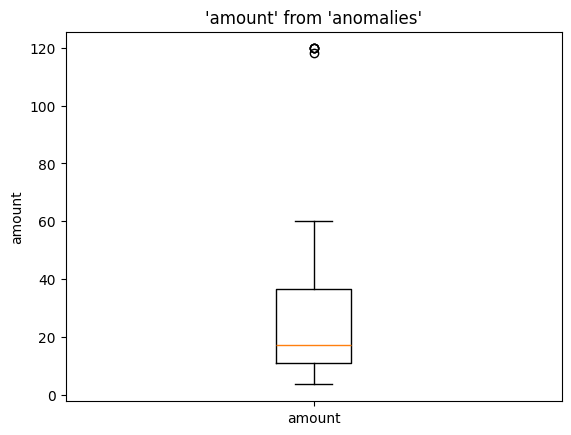

In [22]:
%sqlplot boxplot --table anomalies --column amount

## Explore features table

In [19]:
%sql SELECT COUNT(*) FROM icecat.default.user_features;

Running query in 'duckdb'

count_star()
2955


In [17]:
%%sql
SELECT * FROM iceberg_snapshots('icecat.default.user_features');

Running query in 'duckdb'

sequence_number,snapshot_id,timestamp_ms,manifest_list
1,889761828871554275,2025-09-06 06:12:58.364000,file:///tmp/warehouse/default/user_features/metadata/snap-889761828871554275-0-09da7a9a-dc1d-4e3f-84fe-cc8c80c86dd7.avro


In [5]:
%%sql
SELECT
    *
FROM icecat.default.user_features;

Running query in 'duckdb'

user_id,dt,spending_mean_7d
43,2025-08-18,7.11
45,2025-08-18,18.06
51,2025-08-18,17.66
56,2025-08-18,14.84
72,2025-08-18,2.47
21,2025-08-18,26.35
25,2025-08-18,2.80
87,2025-08-18,6.13
4,2025-08-18,1.74
23,2025-08-18,10.78


In [19]:
%%sql
# tmp
SELECT
    *
FROM icecat.default.raw_events
WHERE
    user_id = 42
ORDER BY event_timestamp

Running query in 'duckdb'

id,user_id,amount,vendor_id,event_timestamp
393213784204,42,27.79,240,2025-08-26 19:45:18-07:00
182938168470,42,39.91,575,2025-09-07 02:17:14-07:00
393213784188,42,5.22,819,2025-09-08 06:18:58-07:00


In [21]:
%%sql
# Tmpe
SELECT
    *
FROM icecat.default.user_features
WHERE
    user_id = 42
ORDER BY dt

Running query in 'duckdb'

user_id,dt,spending_mean_7d
42,2025-08-26,3.97
42,2025-08-27,3.97
42,2025-08-28,3.97
42,2025-08-29,3.97
42,2025-08-30,3.97
42,2025-08-31,3.97
42,2025-09-01,3.97
42,2025-09-02,0.00
42,2025-09-03,0.00
42,2025-09-04,0.00


## Explore Model Metadata Table

In [14]:
%sql SELECT COUNT(*) FROM icecat.default.model_training_metadata;

Running query in 'duckdb'

count_star()
0


In [16]:
%%sql
SELECT
    *
FROM icecat.default.model_training_metadata;

Running query in 'duckdb'

model_version,trained_at,feature_snapshot_id,raw_events_snapshot_id,feature_columns,training_params,model_metrics
v1.2.3,2025-09-05 23:13:03.442435-07:00,3006735830195850791,5186216651125618041,['spending_mean_7d'],"{'seed': 21, 'window': 3.0, 'threshold': 0.6000000238418579}","{'accuracy': 0.8399999737739563, 'precision': 0.7400000095367432, 'recall': 0.49000000953674316}"


# Explore data via pyiceberg

In [12]:
from pyiceberg.catalog import load_catalog
import datetime

catalog = load_catalog(
    "rest",
    **{
        "type": "rest",
        "uri": "http://localhost:8181/",
        "warehouse": "file:///tmp/warehouse",
    },
)

In [8]:
table = catalog.load_table("default.raw_events")
print(table.spec())
print("+"*40)
print(table.inspect.snapshots())

[
  1000: dt: day(5)
]
++++++++++++++++++++++++++++++++++++++++
pyarrow.Table
committed_at: timestamp[ms] not null
snapshot_id: int64 not null
parent_id: int64
operation: string
manifest_list: string not null
summary: map<string, string>
  child 0, entries: struct<key: string not null, value: string> not null
      child 0, key: string not null
      child 1, value: string
----
committed_at: [[2025-09-03 05:12:34.635,2025-09-03 05:12:34.685]]
snapshot_id: [[5698247125504750342,4120292667839152276]]
parent_id: [[null,5698247125504750342]]
operation: [["append","append"]]
manifest_list: [["file:///tmp/warehouse/default/raw_events/metadata/snap-5698247125504750342-0-20e8c4a2-7e3b-4f31-9e7c-8a6d274360c3.avro","file:///tmp/warehouse/default/raw_events/metadata/snap-4120292667839152276-0-6d9eae7d-3014-4c95-b794-c774c8ef2fa7.avro"]]
summary: [[keys:["added-files-size","added-data-files","added-records","changed-partition-count","total-data-files","total-delete-files","total-records","total-fi

In [9]:
print(f"Total table count: {table.scan().count()}")
print("="*50)
for snap in table.snapshots():
    print(f"Snapshot ID: {snap.snapshot_id}")
    # snap = table.snapshot_by_id(snapshot)
    print(f"Snapshot row count: {table.scan(snapshot_id=snap.snapshot_id).count():,}")
    print(f"snapshot's schema id: {snap.schema_id}")
    print(f"snapshot's sequence number: {snap.sequence_number}")
    print(f"snapshot's parent snapshot id: {snap.parent_snapshot_id}")
    print(f"snapshot's timestamp (epoch ms): {snap.timestamp_ms}")
    print("="*50)

Total table count: 2000
Snapshot ID: 5698247125504750342
Snapshot row count: 1,000
snapshot's schema id: 0
snapshot's sequence number: 1
snapshot's parent snapshot id: None
snapshot's timestamp (epoch ms): 1756876354635
Snapshot ID: 4120292667839152276
Snapshot row count: 2,000
snapshot's schema id: 0
snapshot's sequence number: 2
snapshot's parent snapshot id: 5698247125504750342
snapshot's timestamp (epoch ms): 1756876354685


In [10]:
snapshot = table.snapshot_as_of_timestamp(1756861550096)
if snapshot:
    print(f"Row count as of: {table.scan(snapshot_id=snapshot.snapshot_id).count()}")

In [13]:
int(datetime.datetime.now(datetime.UTC).timestamp()) * 1000

1756876452000

# Test feature creation from raw_events

In [ ]:
%%sql duckdb --save temp
WITH bounds AS (
    SELECT user_id,
        MIN(CAST(event_timestamp AS DATE)) AS start_dt,
        MAX(CAST(event_timestamp AS DATE)) AS end_dt
    FROM icecat.default.raw_events
    GROUP BY 1
),
calendar AS (
    SELECT b.user_id,
        d::DATE AS dt
    FROM bounds b,
        LATERAL (
            SELECT *
            FROM generate_series(b.start_dt, b.end_dt, INTERVAL 1 DAY)
        ) gs(d)
),
daily AS (
    SELECT
        user_id,
        CAST(event_timestamp AS DATE) AS dt,
        SUM(amount) AS daily_spend
    FROM icecat.default.raw_events
    GROUP BY 1, 2
),
daily_filled AS (
    SELECT c.user_id,
        c.dt,
        COALESCE(d.daily_spend, 0) AS daily_spend
    FROM calendar c
    LEFT JOIN daily d
        ON d.user_id = c.user_id AND d.dt = c.dt
)
SELECT
    user_id,
    dt,
    daily_spend,
    CAST(
        SUM(daily_spend) OVER (
            PARTITION BY user_id
            ORDER BY dt
            ROWS BETWEEN 6 PRECEDING AND CURRENT ROW
        ) / 7.0
        AS DECIMAL(15, 2)
    ) AS spending_mean_7d
FROM daily_filled
WHERE user_id = '42'
ORDER BY dt;

Your query is using one or more of the following snippets: raw_events, raw_events. JupySQL does not support snippet expansion within CTEs yet, CTE generation is disabled

user_id,dt,daily_spend,spending_mean_7d
42,2025-08-06,84.12,12.017142857142858
42,2025-08-07,107.57,27.384285714285713
42,2025-08-08,0.00,27.384285714285713
42,2025-08-09,0.00,27.384285714285713
42,2025-08-10,163.42,50.730000000000004
42,2025-08-11,0.00,50.730000000000004
42,2025-08-12,224.31,82.77428571428571
42,2025-08-13,27.59,74.69857142857143
42,2025-08-14,9.29,60.65857142857143
42,2025-08-15,0.00,60.65857142857143


In [24]:
%sql select count(*) from temp

Generating CTE with stored snippets: 'temp'

Running query in 'duckdb'

count_star()
28
